## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import warnings # This library will be used to ignore some warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Load the data

In [3]:
loan = pd.read_csv("loan.csv" , low_memory=False)
loan.shape

(39717, 111)

### Removing white_spaces from the column names

In [4]:
loan = loan.rename(columns= lambda x: x.strip(), inplace=False)
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Total records present at start

In [5]:
total_count = loan.shape[0]
print("Initial count of records",total_count)

Initial count of records 39717


### Remove all null value column.

In [6]:
loan.dropna(how='all', axis=1, inplace=True)
loan.shape#Remove all null value column.


(39717, 57)

In [7]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Determine the percentage of missing values in columns

In [8]:
percent_missing = loan.isnull().sum() * 100 / len(loan)
round(percent_missing.sort_values(ascending=False),0).head(20)

next_pymnt_d                  97.0
mths_since_last_record        93.0
mths_since_last_delinq        65.0
desc                          33.0
emp_title                      6.0
emp_length                     3.0
pub_rec_bankruptcies           2.0
last_pymnt_d                   0.0
chargeoff_within_12_mths       0.0
collections_12_mths_ex_med     0.0
revol_util                     0.0
tax_liens                      0.0
title                          0.0
last_credit_pull_d             0.0
home_ownership                 0.0
int_rate                       0.0
out_prncp_inv                  0.0
total_pymnt                    0.0
total_pymnt_inv                0.0
total_rec_prncp                0.0
dtype: float64

### Remove the columns with more than 60% missing values

In [9]:
loan.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)
loan.shape

(39717, 54)

### Remove the column with same value in rows

In [10]:
drop_cols = [col for col
             in list(loan)
             if loan[col].nunique() <= 1]
loan = loan.drop(columns=drop_cols)
loan.shape

(39717, 45)

### Dropping columns
#### 1. Dropping member_id since it is an internal id maintained by system
#### 2. Dropping the Url, description and zipcode columns since they are not playing role in the classification

In [11]:
loan.drop(['member_id','url','zip_code','desc'],axis = 1,inplace = True)
loan.shape

(39717, 41)

#### Remove duplicate rows

In [12]:
loan = loan.drop_duplicates()
loan.shape


(39717, 41)

#### Dropping additional columns as they are not required to resolve the problem statement. rather they are of the current status of the running loans

In [13]:
drop_list = ['delinq_2yrs','inq_last_6mths','open_acc','revol_bal','revol_util',\
             'total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',\
             'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',\
             'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']
loan.drop(drop_list, axis = 1,inplace = True)
loan.shape


(39717, 23)

#### Checking % of NaNs in columns (>0)

In [14]:
missValuePerctangeInColm = round(100*loan.isnull().sum()/len(loan.index),4)
missValuePerctangeInColm[missValuePerctangeInColm!=0]

emp_title               6.1913
emp_length              2.7066
title                   0.0277
pub_rec_bankruptcies    1.7549
dtype: float64

#### Drop null value rows in Title column since the percentage of NaNns in this column is very less (0.0277)

In [15]:
loan = loan[~(loan.title.isnull())]
missValuePerctangeInColm = round(100*loan.isnull().sum()/len(loan.index),4)
missValuePerctangeInColm[missValuePerctangeInColm!=0]

emp_title               6.1880
emp_length              2.7049
pub_rec_bankruptcies    1.7554
dtype: float64

#### Get the Percentage of unique values in 'pub_rec_bankruptcies' column

In [16]:
loan.pub_rec_bankruptcies.value_counts(dropna=False, normalize=True).mul(100).round(3)

0.0    94.011
1.0     4.216
NaN     1.755
2.0     0.018
Name: pub_rec_bankruptcies, dtype: float64

#### Imputing NaNs in 'pub_rec_bankruptcies' column with '0' and converting the dtype to 'int'

In [17]:
loan.pub_rec_bankruptcies.fillna('0',inplace=True)
loan.pub_rec_bankruptcies = loan.pub_rec_bankruptcies.astype('int')

#### Recheck 'pub_rec_bankruptcies' column unique values and dtype

In [18]:
print(loan.pub_rec_bankruptcies.unique())
print(loan.pub_rec_bankruptcies.dtype)

[0 1 2]
int32


#### Rechecking percentage of NaNs in columns (>0)

In [19]:
missValuePerctangeInColm = round(100*loan.isnull().sum()/len(loan.index),2)
missValuePerctangeInColm[missValuePerctangeInColm!=0]

emp_title     6.19
emp_length    2.70
dtype: float64

In [20]:
loan

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,earliest_cr_line,pub_rec,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,Jan-85,0,0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,Apr-99,0,0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,Nov-01,0,0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,Feb-96,0,0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,Source Verified,Dec-11,Current,other,Personal,OR,17.94,Jan-96,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,...,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,CO,11.33,Nov-90,0,0
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",...,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,NC,6.40,Dec-86,0,0
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,...,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,MA,2.30,Oct-98,0,0
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,...,Not Verified,Jul-07,Fully Paid,other,JAL Loan,MD,3.72,Nov-88,0,0


#### Replacing null values in 'emp_title' column with 'undisclosed'

In [21]:
loan.emp_title.fillna('Not Set',inplace=True)

#### Replacing null values in emp_length with 'undisclosed' and since the possible values of years are from 0 to 10, making changes.

In [22]:
loan.emp_length.fillna("Not Set",inplace = True)
loan['emp_length'] = loan['emp_length'].replace({"< 1 year":'0','10+ years':'10'})
loan['emp_length'] = loan['emp_length'].str.strip().str.strip(' years')
loan.emp_length.unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', 'Not Set'],
      dtype=object)

In [23]:
##Convert the datatype of amount columns to float type
amountCols = ['loan_amnt','funded_amnt']
loan[amountCols] = loan[amountCols].astype(float)

In [24]:
loan.dtypes

id                        int64
loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                     float64
earliest_cr_line         object
pub_rec                   int64
pub_rec_bankruptcies      int32
dtype: object

In [25]:
loan

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,earliest_cr_line,pub_rec,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,Not Set,...,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,Jan-85,0,0
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,Apr-99,0,0
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,Not Set,...,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,Nov-01,0,0
3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,Feb-96,0,0
4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,Source Verified,Dec-11,Current,other,Personal,OR,17.94,Jan-96,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,...,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,CO,11.33,Nov-90,0,0
39713,90665,8500.0,8500.0,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",...,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,NC,6.40,Dec-86,0,0
39714,90395,5000.0,5000.0,1325.0,36 months,8.07%,156.84,A,A4,Not Set,...,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,MA,2.30,Oct-98,0,0
39715,90376,5000.0,5000.0,650.0,36 months,7.43%,155.38,A,A2,Not Set,...,Not Verified,Jul-07,Fully Paid,other,JAL Loan,MD,3.72,Nov-88,0,0


#### Converting the date columns (issue_d and earliest_cr_line) to datetime datatype

In [26]:
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'],format='%b-%y')
loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y')

#### Adding new columns MonthOfIssue and YearOfIssue by extracting the month and year of issue_d resp

In [27]:
loan['MonthOfIssue'] = loan.issue_d.dt.month
loan['YearOfIssue'] = loan.issue_d.dt.year

0        2011
1        2011
2        2011
3        2011
5        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: YearOfIssue, Length: 38566, dtype: int64

#### Adding new columns MonthOfCr and YearOfCrLint by extracting the month and year of earliest_cr_line column

In [28]:
loan['MonthOfCr'] = loan.earliest_cr_line.dt.month
loan['YearOfCrLint'] = loan.earliest_cr_line.dt.year

In [29]:
#Identify the year derived from teh earliest_cr_line column is relevant
loan['YearOfCrLint'].sort_values(ascending=True).unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2046, 2050, 2054, 2056,
       2059, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068], dtype=int64)

In [30]:
#It is seen that there are year values (above 2008) which are of future which is not possible hence we need to substitute a proper value to those furute year values
#Hence considering them as error we can reduce them by 100
loan.loc[loan['YearOfCrLint'] > 2008 , 'YearOfCrLint']  = loan[loan['YearOfCrLint'] > 2008]['YearOfCrLint']-100

In [31]:
loan['YearOfCrLint'].sort_values(ascending=True).unique()

array([1946, 1950, 1954, 1956, 1959, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

In [32]:
# treat the int_rate column as to remove teh percentage symbol and keeping it as float
loan['int_rate'] = loan['int_rate'].str.strip().str.strip('%').astype('float')
loan['int_rate'].dtypes

dtype('float64')

In [33]:
loan.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [34]:
#converting the term column to integer value by removing the month work
loan.term = loan.term.str.strip().str.strip(' months').astype('int')

#### Find the loan status percentage count for the categories Fully Paid ,Charged off and Current

In [35]:
loan.loan_status.value_counts(normalize=True).mul(100).round(2)

Fully Paid     82.96
Charged Off    14.17
Current         2.87
Name: loan_status, dtype: float64

In [36]:
#remove the records whose loan status is Current as they are no the players in determining the defaulters Vs non-defaulters
loan = loan[~(loan["loan_status"]=='Current')]

##Set values for 'loan_status' variable's unqiue entires. Assign '0' to 'fully paid' and set 'charged off' to '1' (as our target is determine 'defaulter' factors)
loan["loan_status"] = loan["loan_status"].replace('Fully Paid','0')
loan["loan_status"] = loan["loan_status"].replace('Charged Off','1') #Set Target Variable
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,title,addr_state,dti,earliest_cr_line,pub_rec,pub_rec_bankruptcies,MonthOfIssue,YearOfIssue,MonthOfCr,YearOfCrLint
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,Not Set,...,Computer,AZ,27.65,1985-01-01,0,0,12,2011,1,1985
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,Ryder,...,bike,GA,1.00,1999-04-01,0,0,12,2011,4,1999
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,Not Set,...,real estate business,IL,8.72,2001-11-01,0,0,12,2011,11,2001
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,personel,CA,20.00,1996-02-01,0,0,12,2011,2,1996
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,...,My wedding loan I promise to pay back,AZ,11.20,2004-11-01,0,0,12,2011,11,2004


In [37]:
loan

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,title,addr_state,dti,earliest_cr_line,pub_rec,pub_rec_bankruptcies,MonthOfIssue,YearOfIssue,MonthOfCr,YearOfCrLint
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,Not Set,...,Computer,AZ,27.65,1985-01-01,0,0,12,2011,1,1985
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,Ryder,...,bike,GA,1.00,1999-04-01,0,0,12,2011,4,1999
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,Not Set,...,real estate business,IL,8.72,2001-11-01,0,0,12,2011,11,2001
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,personel,CA,20.00,1996-02-01,0,0,12,2011,2,1996
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,...,My wedding loan I promise to pay back,AZ,11.20,2004-11-01,0,0,12,2011,11,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36,8.07,78.42,A,A4,FiSite Research,...,Home Improvement,CO,11.33,1990-11-01,0,0,7,2007,11,1990
39713,90665,8500.0,8500.0,875.0,36,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",...,Retiring credit card debt,NC,6.40,1986-12-01,0,0,7,2007,12,1986
39714,90395,5000.0,5000.0,1325.0,36,8.07,156.84,A,A4,Not Set,...,MBA Loan Consolidation,MA,2.30,1998-10-01,0,0,7,2007,10,1998
39715,90376,5000.0,5000.0,650.0,36,7.43,155.38,A,A2,Not Set,...,JAL Loan,MD,3.72,1988-11-01,0,0,7,2007,11,1988


In [38]:
#Check for assigned '0' to 'fully paid' and set 'charged off' to '1' (as our target is to determine 'defaulter' factors)
loan.loan_status.unique()

array(['0', '1'], dtype=object)

In [39]:
#Check 'loan_status' for value counts
loan.loan_status.value_counts()

0    32941
1     5625
Name: loan_status, dtype: int64

In [40]:
#determine the continious and the categorical variables
#below columns are considered as continious variables
col_continious = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','pub_rec','pub_rec_bankruptcies']
#put the other variables as categorical variables
col_catagorical = pd.DataFrame(loan.columns)
col_catagorical = col_catagorical[~(col_catagorical[0].isin(col_continious))]

In [41]:
col_continious

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'pub_rec',
 'pub_rec_bankruptcies']

In [42]:
col_catagorical

,0
0,id
4,term
7,grade
8,sub_grade
9,emp_title
10,emp_length
11,home_ownership
13,verification_status
14,issue_d
15,loan_status


# Univariate Analysis and Segmented Univariate Analysis

# Loan Status Analysis:

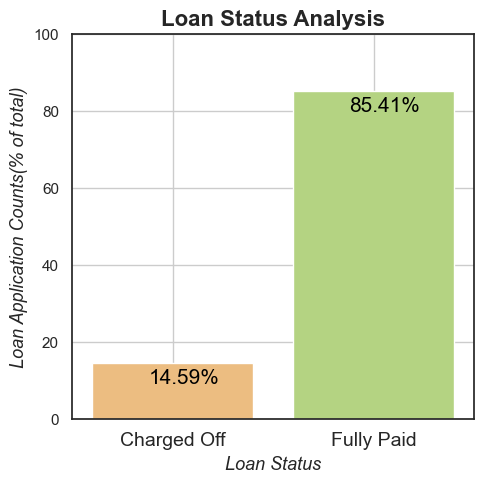

In [43]:
##Lets check how 'loan_status'(%) is distributed
sns.set(style='white')
plt.figure(figsize=(5,5), dpi=100)
br = pd.DataFrame(loan.loan_status.value_counts(normalize=True).mul(100).sort_values())
br.reset_index(inplace=True)
br = br.rename(columns= {'loan_status':'loan_status_count'})
ax = sns.barplot(x='index',y='loan_status_count', data=br, palette='RdYlGn')
ax.set_xticklabels(labels=['Charged Off','Fully Paid',], rotation='horizontal', fontsize=14)
plt.xlabel('Loan Status', fontsize= 13, fontstyle='italic')
plt.ylabel('Loan Application Counts(% of total)', fontsize= 13, fontstyle='italic')
plt.ylim(0,100)
plt.title('Loan Status Analysis', fontsize=16, fontweight='bold')

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.28, i.get_height()-5.5, \
            str(round((i.get_height()), 2))+"%", fontsize=15, color='black',\
            rotation=0)
    
plt.grid(True)
plt.tight_layout()
plt.show()



### Above analysis shows 14.59 % of the total loan issued have been 'Charged Off' (Defaulted) and 85.41 % are fully paid.

# Loan Issue Year Analysis:

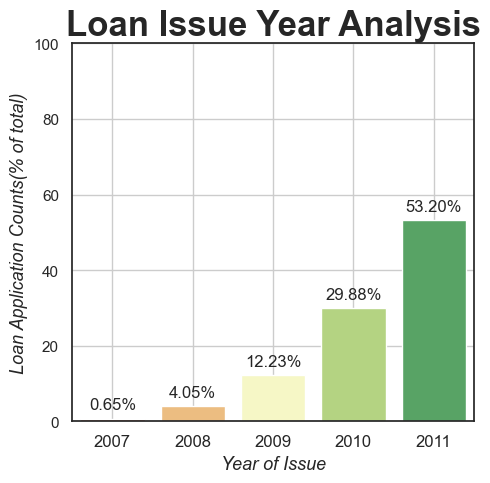

In [44]:
##Lets check the total number of approved applications by year

sns.set(style='white')
plt.figure(figsize=(5,5), dpi=100)
br = pd.DataFrame(loan.YearOfIssue.value_counts(normalize = True).mul(100).sort_values())
br.reset_index(inplace=True)
br = br.rename(columns= {'YearOfIssue':'issue_d_year_count'})
ax = sns.barplot(x='index',y='issue_d_year_count', data=br, palette='RdYlGn')

plt.xlabel('Year of Issue', fontsize= 13, fontstyle='italic')
plt.ylabel('Loan Application Counts(% of total)', fontsize= 13, fontstyle='italic')
plt.title('Loan Issue Year Analysis', fontsize=25, fontweight='bold')
plt.xticks(fontsize=12)
plt.ylim(0,100)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
plt.grid(True)
plt.tight_layout()
plt.show()

### Above analysis shows most of the loans have been given in 2011. This is almost 10 times the loan given year 2008

# Loan Purpose Analysis:

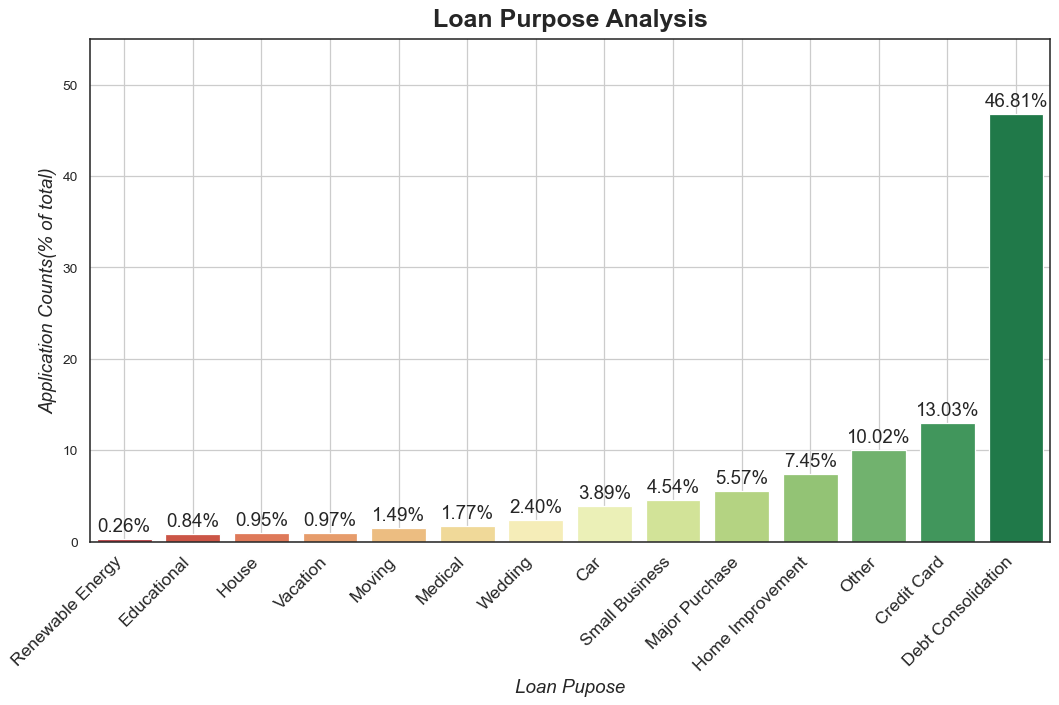

In [45]:
##Loan Purpose analysis
sns.set(style='white')
plt.figure(figsize=(12, 8),dpi = 90)
br = pd.DataFrame(loan.purpose.value_counts(normalize = True).mul(100).sort_values())

br.reset_index(inplace=True)
br = br.rename(columns =  {'index':'Loan_Purpose'} )

ax = sns.barplot(x='Loan_Purpose',y='purpose', data=br, palette='RdYlGn')
ax.set_xticklabels(labels=list(br.Loan_Purpose), fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Loan Pupose', fontsize= 15, fontstyle='italic')
plt.ylabel('Application Counts(% of total)', fontsize= 15, fontstyle='italic')
plt.title('Loan Purpose Analysis', fontsize= 20, fontweight='bold', pad=10)
plt.ylim(0,55)
   
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), fontsize= 15, textcoords = 'offset points' )

plt.xticks(range(0,14),['Renewable Energy','Educational','House','Vacation','Moving','Medical','Wedding','Car',\
                       'Small Business','Major Purchase','Home Improvement','Other','Credit Card','Debt Consolidation'])    
plt.grid(True)
plt.tight_layout()
plt.show()

### Above analysis shows "Debt Conolidation" is the major reason for loan borrowing

# 'Applicant's Loan amount' analysis:

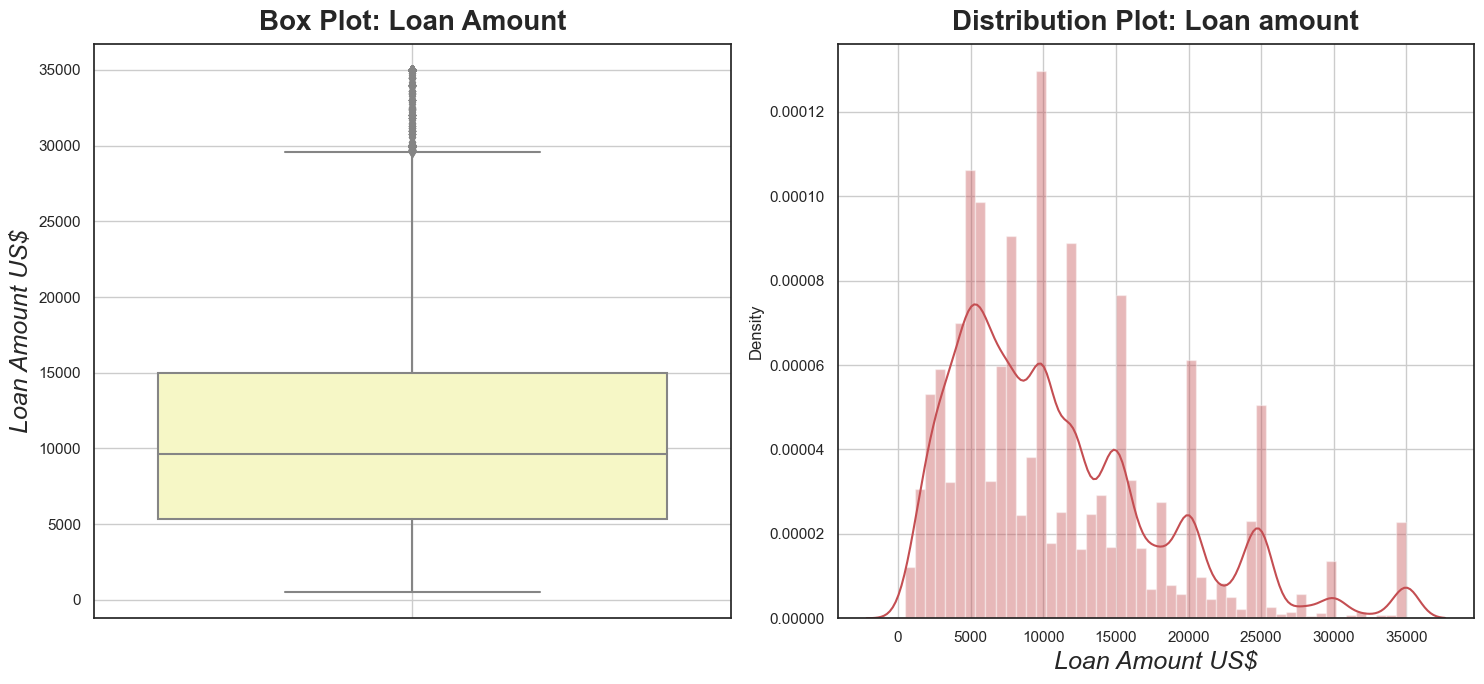

In [46]:
#'Applicant's Loan amount' analysis.
plt.figure(figsize=(15,7))
sns.set(style='white')

plt.subplot(1, 2, 1)

sns.boxplot(y = loan.loan_amnt , palette='RdYlGn')
plt.title('Box Plot: Loan Amount', fontsize= 20, fontweight='bold', pad=10)
plt.ylabel('Loan Amount US$', fontsize= 18, fontstyle='italic')
plt.grid(True)


plt.subplot(1, 2, 2)
sns.distplot(loan.loan_amnt , hist= True,color="r" )
plt.title('Distribution Plot: Loan amount', fontsize= 20, fontweight='bold', pad=10)
plt.xlabel('Loan Amount US$', fontsize= 18, fontstyle='italic')
plt.grid(True)

plt.tight_layout()
plt.show()

### Above analysis shows 50% of loan applicants request a loan amount between 5.3KUSD and 15K USD.

# Applicant's Annual Income Analysis:

In [47]:
#Analyzing the applicant's annual income variable
round(loan.annual_inc.describe(percentiles=[0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99]))

count      38566.0
mean       68782.0
std        64226.0
min         4000.0
0%          4000.0
25%        40000.0
50%        58876.0
75%        82000.0
90%       115000.0
95%       140004.0
98%       187000.0
99%       234210.0
max      6000000.0
Name: annual_inc, dtype: float64

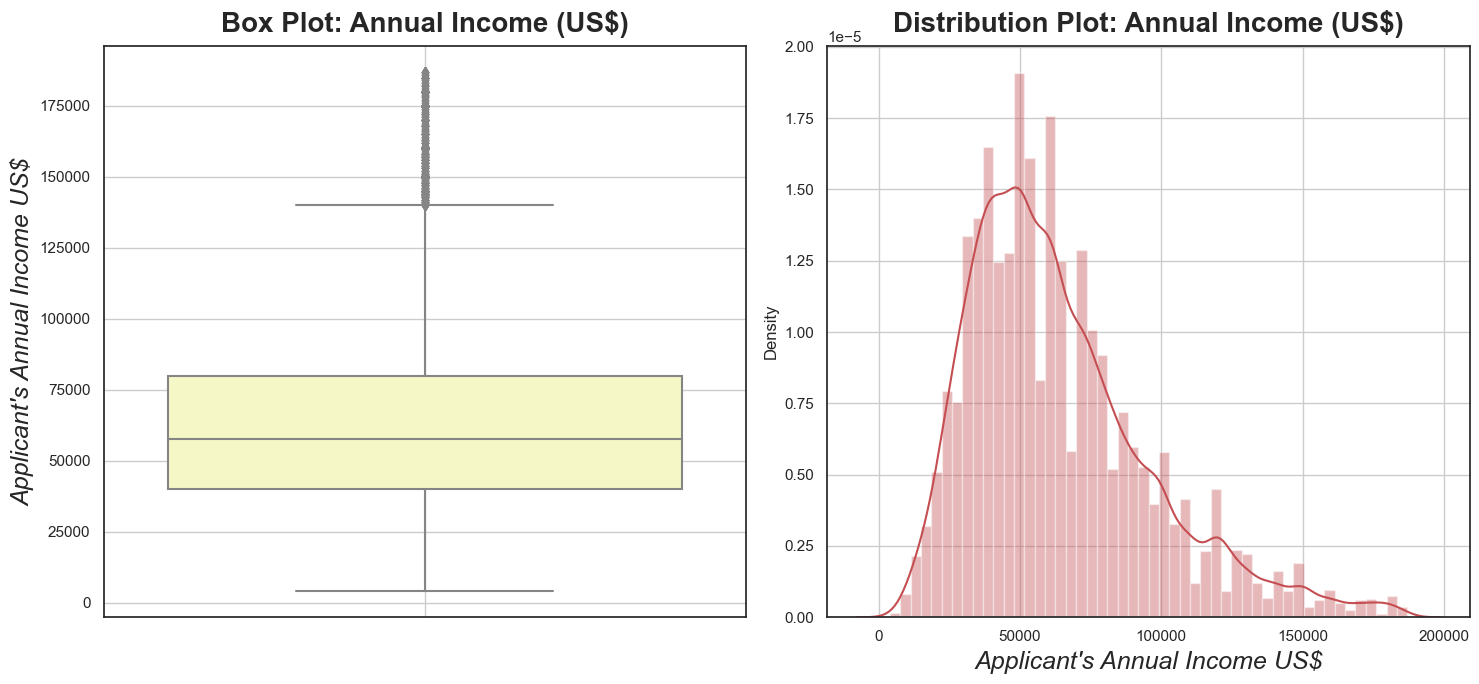

In [48]:
#Eliminating the outliers for analysis, and only considering the data below 98th percentile.
plt.figure(figsize=(15,7))
sns.set(style='white')

plt.subplot(1, 2, 1)
sns.boxplot(y = loan[loan.annual_inc <= 187000 ]['annual_inc'],palette='RdYlGn')
plt.title("Box Plot: Annual Income (US$)", fontsize= 20, fontweight='bold', pad=10)
plt.ylabel("Applicant's Annual Income US$", fontsize= 18, fontstyle='italic')
plt.grid(True)


plt.subplot(1, 2, 2)
sns.distplot(loan[loan.annual_inc <= 187000 ]['annual_inc'] , hist= True ,color="r")
plt.title("Distribution Plot: Annual Income (US$)", fontsize= 20, fontweight='bold', pad=10)
plt.xlabel("Applicant's Annual Income US$", fontsize= 18, fontstyle='italic')
plt.grid(True)

plt.tight_layout()
plt.show()

### Above analysis shows 50% of the applicants earn between 40K USD and 82K USD annually.

In [49]:
round(loan.annual_inc.describe())

count      38566.0
mean       68782.0
std        64226.0
min         4000.0
25%        40000.0
50%        58876.0
75%        82000.0
max      6000000.0
Name: annual_inc, dtype: float64

# Bivariate Analysis

# Correlation Matrix

<Figure size 6000x6000 with 0 Axes>

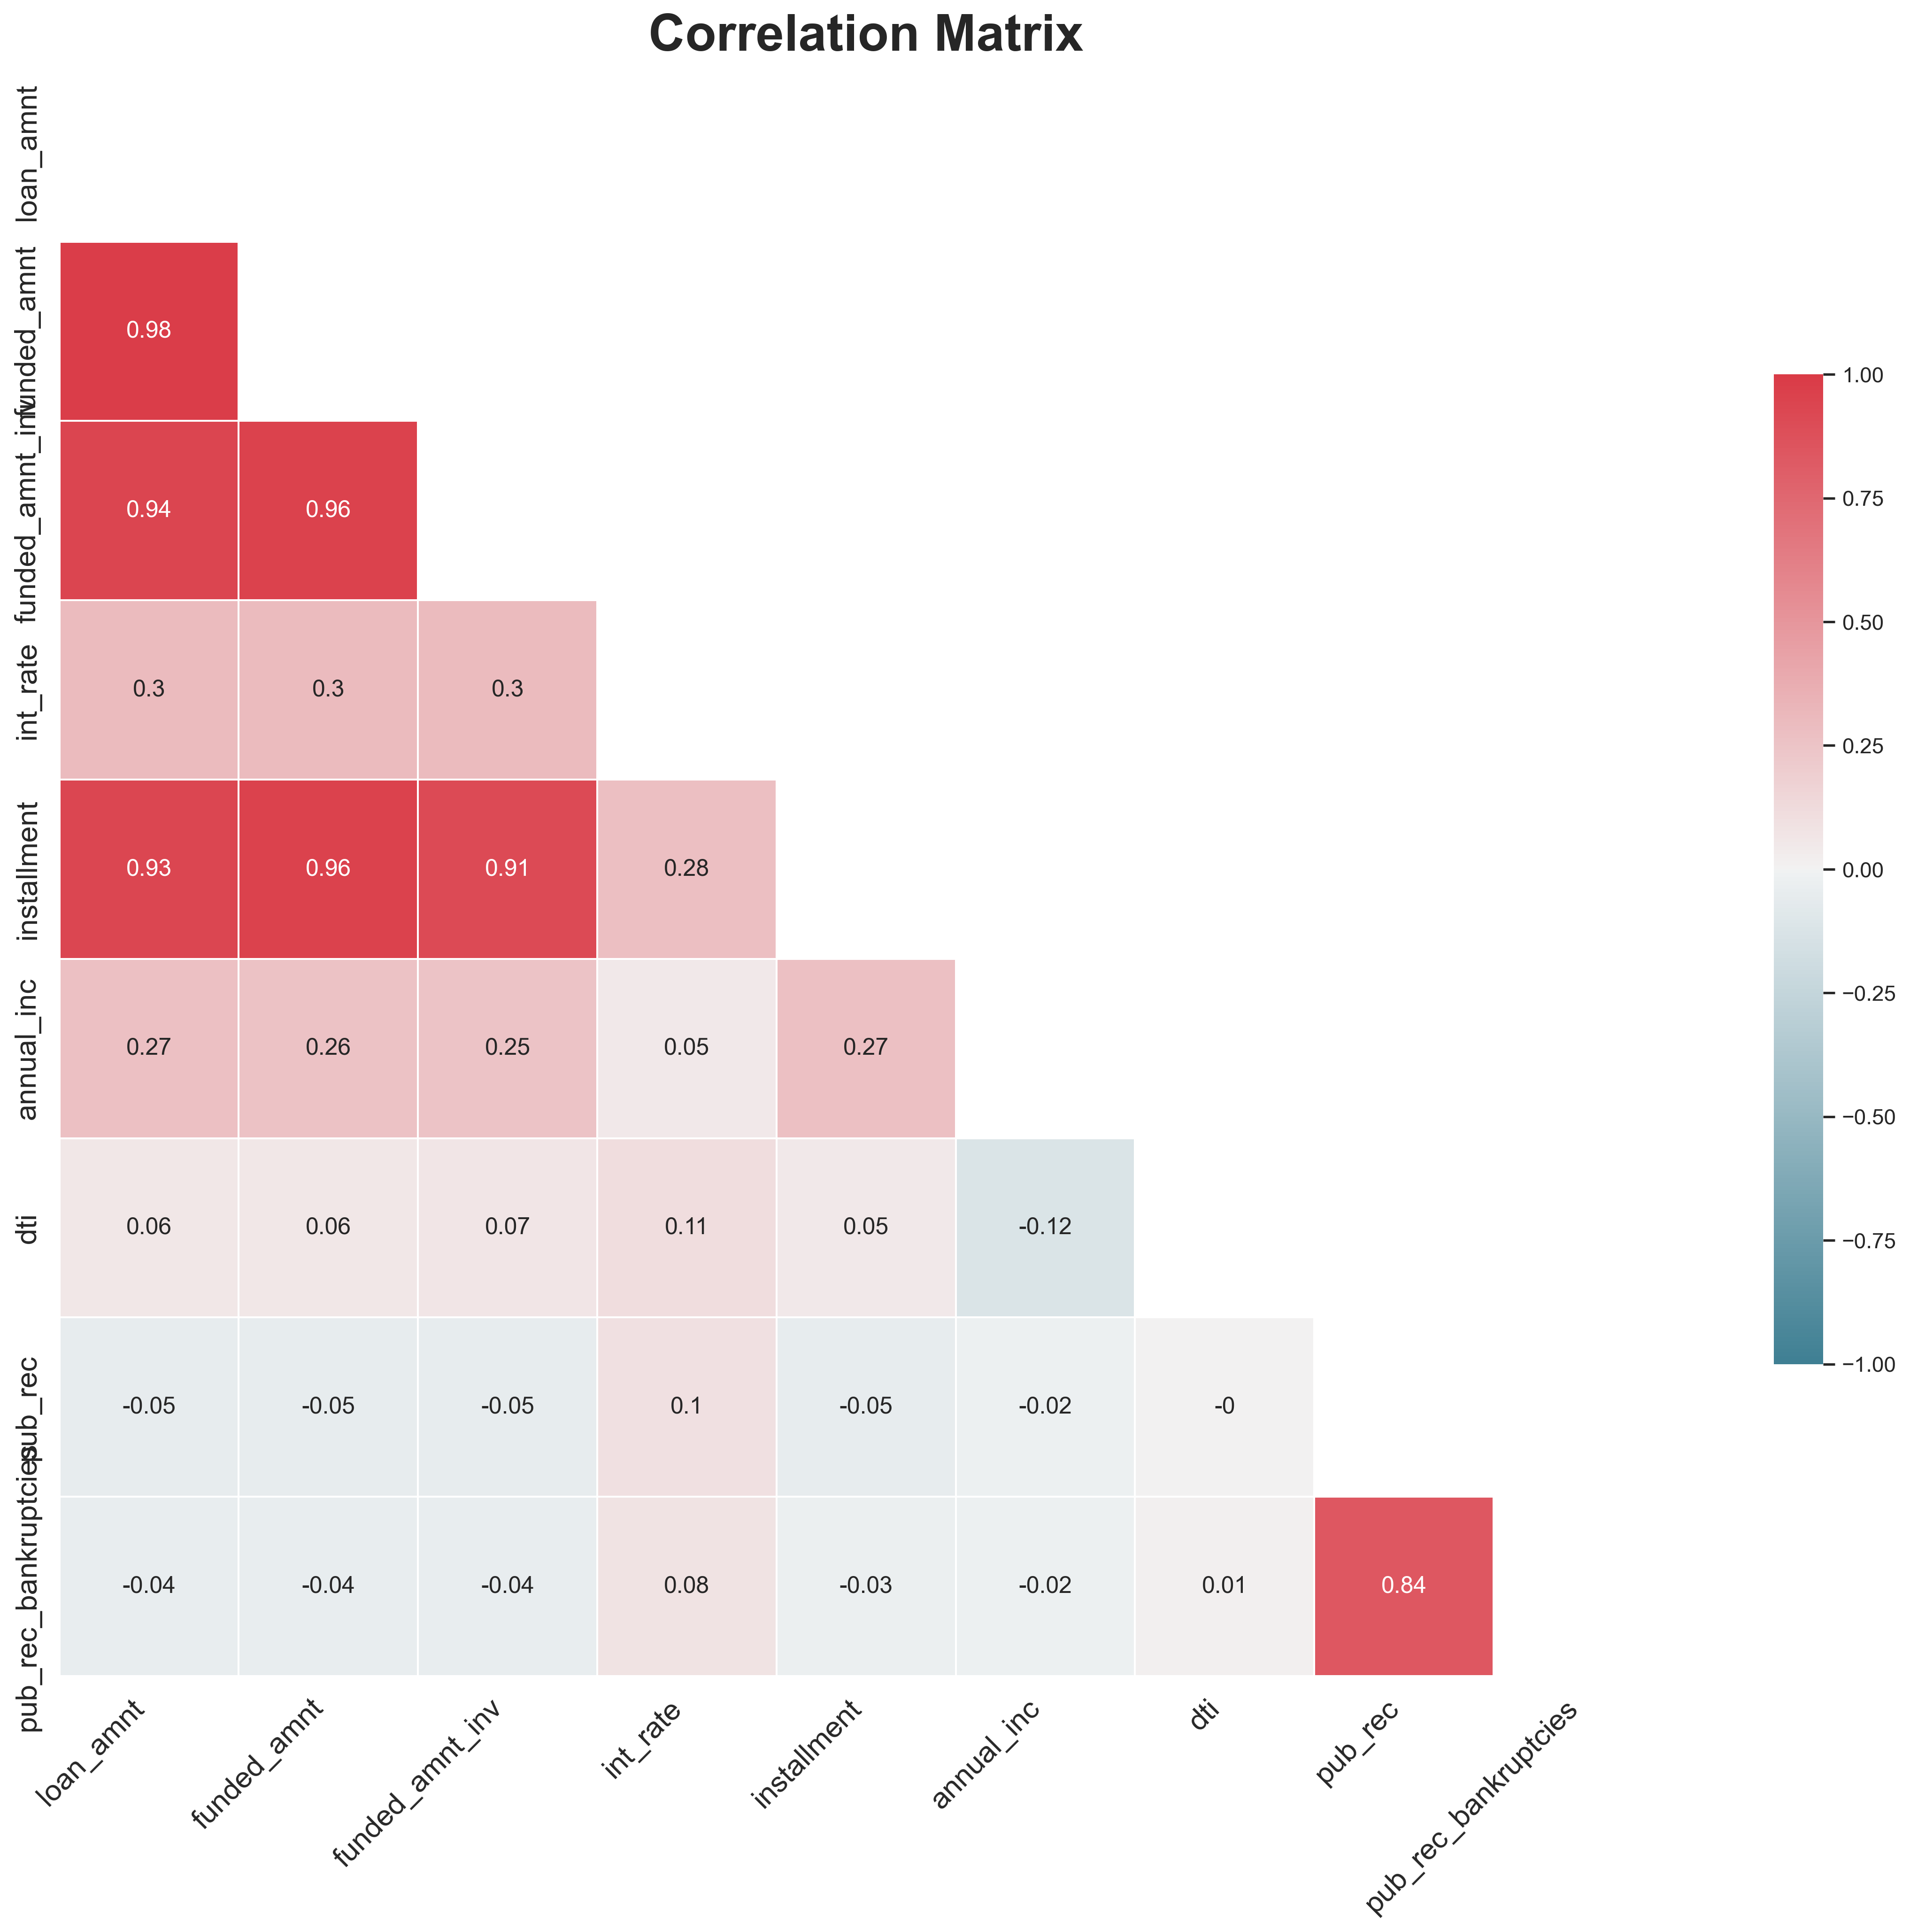

In [50]:
##Bivariate Analyis - Understanding the correlation of continuous variables
sns.set(style='white')
plt.figure (figsize=(20,20), dpi=300)
df_corr_plot1= loan.copy()
#Recall 'col_list_cont: list of columns containing continuous variables'
df_corr_plot1 = df_corr_plot1.loc[:,col_continious]
correlation_matrix1 = round(df_corr_plot1.corr(),2)
correlation_matrix1
mask = np.triu(np.ones_like(correlation_matrix1, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 15), dpi=300)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(correlation_matrix1, mask=mask, cmap=cmap, vmin= -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Correlation Matrix', fontsize=26, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.autoscale()
plt.tight_layout()
plt.show()

# Loan Term by Loan Status Analysis: Overall Percentage

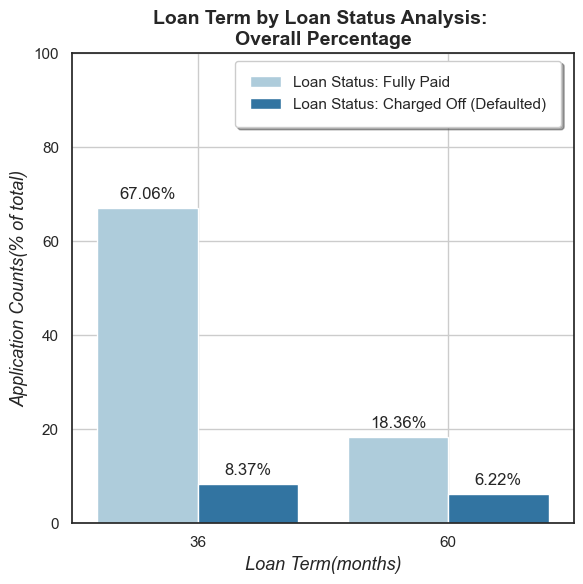

In [51]:
#Analysing applicant's loan term variable 'term' as per 'loan_status'
plt.figure(figsize=(6,6),dpi = 100)
br = pd.DataFrame(100*loan.groupby(['term','loan_status'])['id'].count()/len(loan))
br.reset_index(inplace=True)
br=br.rename(columns={'id':'Percentage'})

ax_123 = sns.barplot(x='term',y='Percentage', hue = 'loan_status',data=br, palette=("Paired"))

plt.xlabel('Loan Term(months)', fontsize= 13, fontstyle='italic')
plt.ylabel('Application Counts(% of total)', fontsize= 13, fontstyle='italic')
plt.title('Loan Term by Loan Status Analysis: \nOverall Percentage', fontsize=14,fontweight='bold')
plt.ylim(0,100)

for p in ax_123.patches:
    ax_123.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
#Legend
T1= ax_123.legend(loc='upper center', bbox_to_anchor=(0.65, 1.00), fancybox=True, framealpha=1, shadow=True, borderpad=1)
T1.get_texts()[0].set_text('Loan Status: Fully Paid')
T1.get_texts()[1].set_text('Loan Status: Charged Off (Defaulted)')
plt.grid(True)
plt.tight_layout()
plt.show()    

### Above analysis shows most of the defaulters belong to the 36 month loan term

# Relationship: Average Interest Rate vs Grade

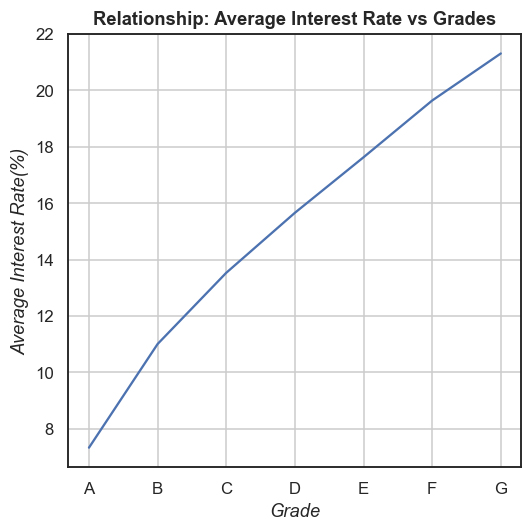

In [52]:
#Average Interest Rate by Grades
sns.set(style='white')
plt.figure(figsize=(5,5), dpi=110)
loan.groupby(['grade']).int_rate.mean().plot.line()
plt.xlabel('Grade', fontsize=12,fontstyle='italic')
plt.ylabel('Average Interest Rate(%)', fontsize=12,fontstyle='italic')
plt.title('Relationship: Average Interest Rate vs Grades', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.autoscale()
plt.grid(True)
plt.show()

### Above analysis shows as the grade move from A to G the agerage interest rates goes on increasing. Hence there is a higher risk of defaulting involved as the grade increases.

# Defaulter Rate(%) as per 'Grade' and Loan Status Analysis

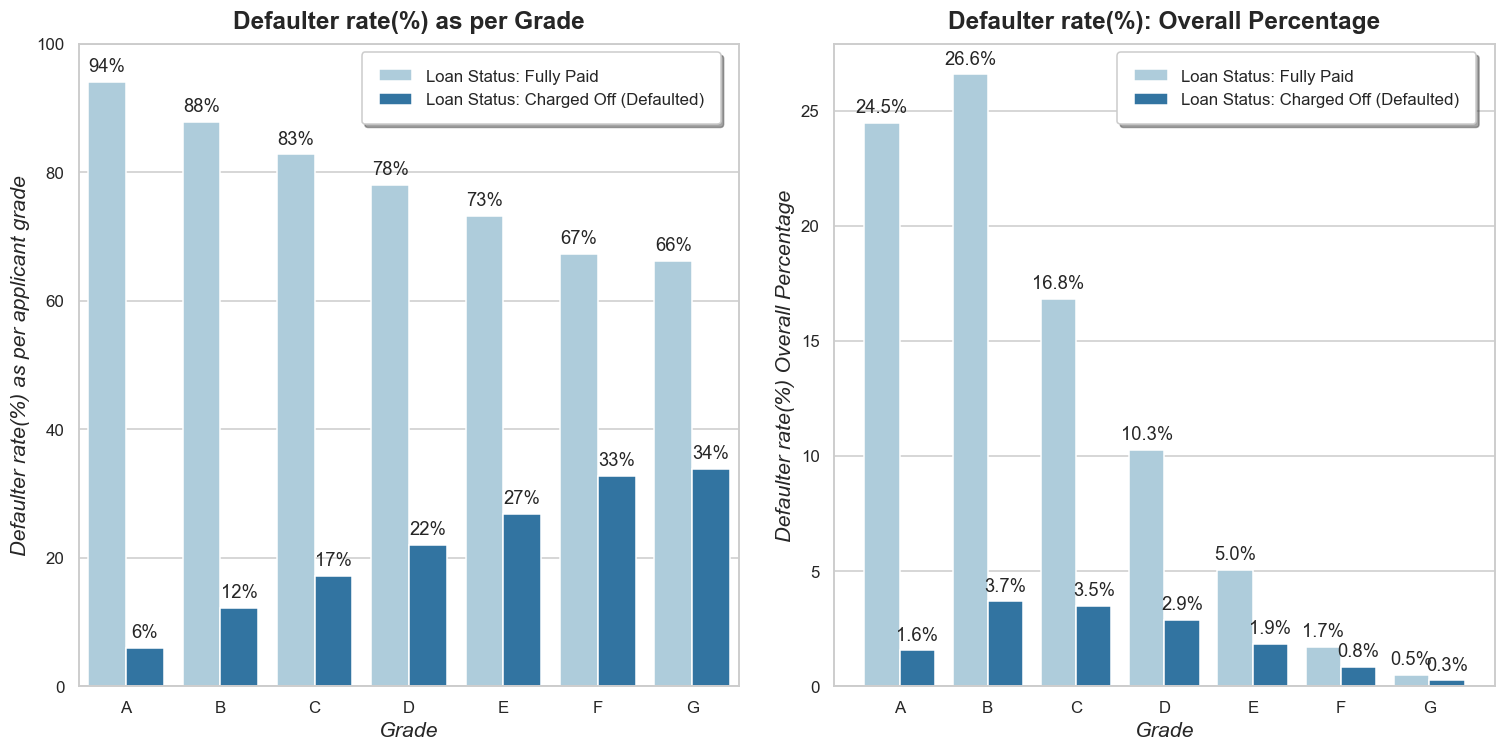

In [53]:
##Defaulter Rate(%) as per 'grade' analysis. Finding the defaulter rate (%) using 'grade' and 'loan_status' variables.
grade_ls = loan.loc[:,['grade','loan_status']]
grade_ls_gpby = grade_ls.groupby(['grade','loan_status']).size().to_frame('c_gls')
grade_ls_gpby.reset_index(inplace=True)
grade_ls_gpby['pct_count_gwise']= ""
grade_ls_gpby['c_gls'] = grade_ls_gpby['c_gls'].astype('int')


A = grade_ls_gpby[grade_ls_gpby.grade=='A']
A.pct_count_gwise = round(100*A['c_gls']/A['c_gls'].sum(),2)
B = grade_ls_gpby[grade_ls_gpby.grade=='B']
B.pct_count_gwise = round(100*B['c_gls']/B['c_gls'].sum(),2)
C = grade_ls_gpby[grade_ls_gpby.grade=='C']
C.pct_count_gwise = round(100*C['c_gls']/C['c_gls'].sum(),2)
D = grade_ls_gpby[grade_ls_gpby.grade=='D']
D.pct_count_gwise = round(100*D['c_gls']/D['c_gls'].sum(),2)
E = grade_ls_gpby[grade_ls_gpby.grade=='E']
E.pct_count_gwise = round(100*E['c_gls']/E['c_gls'].sum(),2)
F = grade_ls_gpby[grade_ls_gpby.grade=='F']
F.pct_count_gwise = round(100*F['c_gls']/F['c_gls'].sum(),2)
G = grade_ls_gpby[grade_ls_gpby.grade=='G']
G.pct_count_gwise = round(100*G['c_gls']/G['c_gls'].sum(),2)

grade_ls_final = pd.concat([A,B,C,D,E,F,G])
#plot
sns.set(style='whitegrid')
plt.figure(figsize=(14,7), dpi=110)

#subplot 1
plt.subplot(121)
ax_G = sns.barplot(x=grade_ls_final.grade, y=grade_ls_final.pct_count_gwise, hue=grade_ls_final.loan_status, palette='Paired')
plt.xlabel('Grade', fontsize= 14, fontstyle='italic')
plt.ylabel('Defaulter rate(%) as per applicant grade', fontsize= 14, fontstyle='italic')
plt.ylim(0,100)
plt.title('Defaulter rate(%) as per Grade',fontsize= 16, fontweight='bold', pad=10)
#Legend
A= ax_G.legend(loc='upper center', bbox_to_anchor=(0.70, 1.00), fancybox=True, framealpha=1, shadow=True, borderpad=1)
A.get_texts()[0].set_text('Loan Status: Fully Paid')
A.get_texts()[1].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_G.patches:
    ax_G.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), textcoords = 'offset points')

#subplot 2 
plt.subplot(122)
grade_ls_final['pct_count_of_total']= round(100*grade_ls_final['c_gls']/grade_ls_final['c_gls'].sum(),2)

ax_T = sns.barplot(x=grade_ls_final.grade, y=grade_ls_final.pct_count_of_total, hue=grade_ls_final.loan_status, palette='Paired')
plt.xlabel('Grade', fontsize= 14, fontstyle='italic')
plt.ylabel('Defaulter rate(%) Overall Percentage', fontsize= 14, fontstyle='italic')
plt.title('Defaulter rate(%): Overall Percentage',fontsize= 16, fontweight='bold', pad=10)
#Legend
T= ax_T.legend(loc='upper center', bbox_to_anchor=(0.70, 1.00), fancybox=True, framealpha=1, shadow=True, borderpad=1)
T.get_texts()[0].set_text('Loan Status: Fully Paid')
T.get_texts()[1].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_T.patches:
    ax_T.annotate(format(p.get_height(), '.1f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), fontsize=12, textcoords = 'offset points')

plt.tight_layout()
plt.autoscale()
plt.show()

### From the left graph we see the percentage of defaulters is significantly high within the categories, 'F' and 'G'. 
- This shows Grade'A'are more Credible applicants while  Grade 'G'are Least Credible applicants
- From right graph largest % of approved loan defaulters belong to Grade 'B'(3.7%) and 'C'(3.5%) category.

# Defaulter Rate(%) by 'Employment Length' and 'Loan Status' Analysis

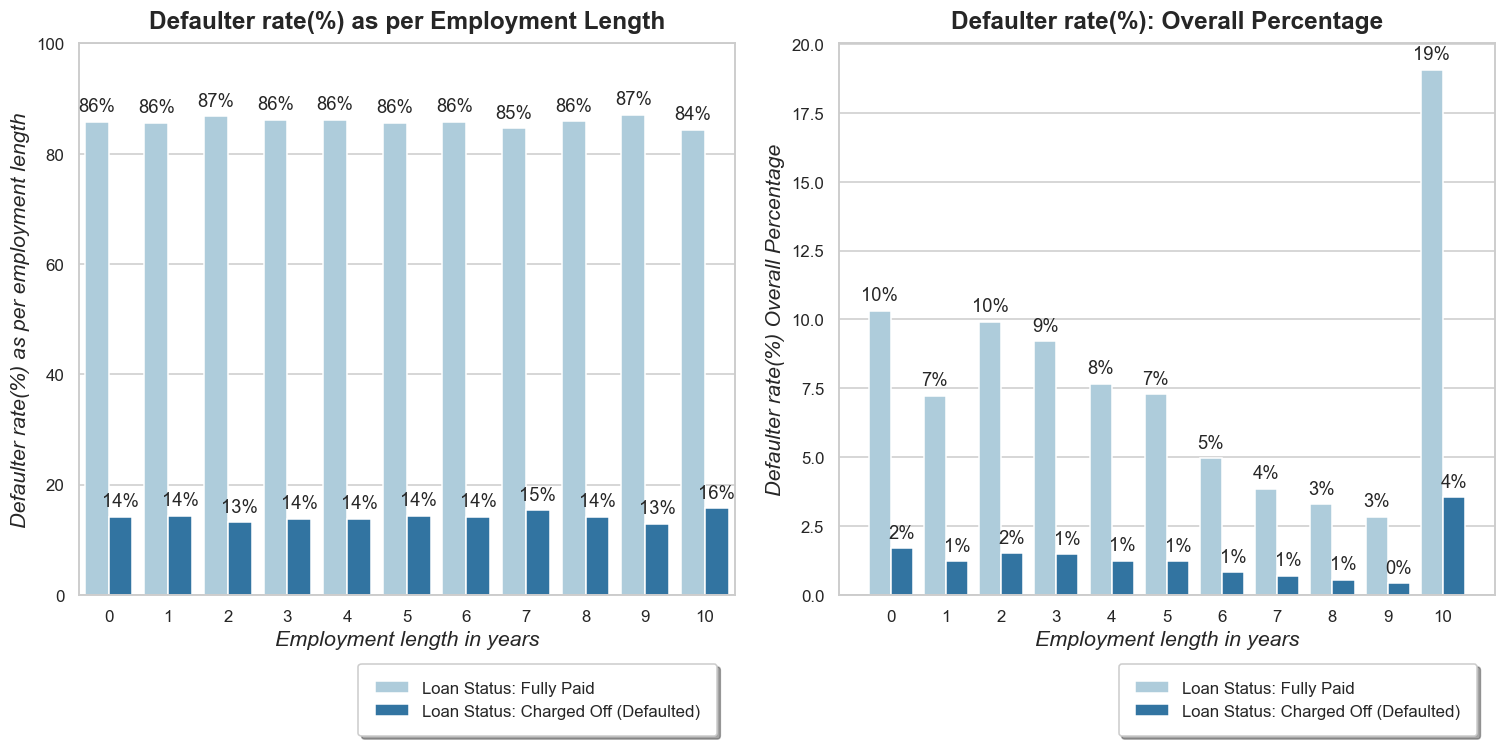

In [54]:
#Employment length and loan status anlaysis. Finding the defaulter rate (%) using 'emp_length' and 'loan_status' variables.
empl_ls = loan.loc[:,['emp_length','loan_status']]
#Retaining only the values known
empl_ls = empl_ls[~(empl_ls.emp_length=='undisclosed')]
empl_ls_gpby = empl_ls.groupby(['emp_length','loan_status']).size().to_frame('c_els')
empl_ls_gpby.reset_index(inplace=True)
empl_ls_gpby['pct_count_lwise']= ""
empl_ls_gpby['c_els'] = empl_ls_gpby['c_els'].astype('int')

E0 = empl_ls_gpby[empl_ls_gpby.emp_length=='0']
E0.pct_count_lwise = round(100*E0['c_els']/E0['c_els'].sum(),2)
E1 = empl_ls_gpby[empl_ls_gpby.emp_length=='1']
E1.pct_count_lwise = round(100*E1['c_els']/E1['c_els'].sum(),2)
E2 = empl_ls_gpby[empl_ls_gpby.emp_length=='2']
E2.pct_count_lwise = round(100*E2['c_els']/E2['c_els'].sum(),2)
E3 = empl_ls_gpby[empl_ls_gpby.emp_length=='3']
E3.pct_count_lwise = round(100*E3['c_els']/E3['c_els'].sum(),2)
E4 = empl_ls_gpby[empl_ls_gpby.emp_length=='4']
E4.pct_count_lwise = round(100*E4['c_els']/E4['c_els'].sum(),2)
E5 = empl_ls_gpby[empl_ls_gpby.emp_length=='5']
E5.pct_count_lwise = round(100*E5['c_els']/E5['c_els'].sum(),2)
E6 = empl_ls_gpby[empl_ls_gpby.emp_length=='6']
E6.pct_count_lwise = round(100*E6['c_els']/E6['c_els'].sum(),2)
E7 = empl_ls_gpby[empl_ls_gpby.emp_length=='7']
E7.pct_count_lwise = round(100*E7['c_els']/E7['c_els'].sum(),2)
E8 = empl_ls_gpby[empl_ls_gpby.emp_length=='8']
E8.pct_count_lwise = round(100*E8['c_els']/E8['c_els'].sum(),2)
E9 = empl_ls_gpby[empl_ls_gpby.emp_length=='9']
E9.pct_count_lwise = round(100*E9['c_els']/E9['c_els'].sum(),2)
E10 = empl_ls_gpby[empl_ls_gpby.emp_length=='10']
E10.pct_count_lwise = round(100*E10['c_els']/E10['c_els'].sum(),2)

empl_ls_final =pd.concat([E0,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10])
empl_ls_final

#plot
sns.set(style='whitegrid')
plt.figure(figsize=(14,7), dpi=110)

#subplot 1
plt.subplot(121)
ax_G = sns.barplot(x=empl_ls_final.emp_length, y=empl_ls_final.pct_count_lwise, hue=empl_ls_final.loan_status, palette='Paired')
plt.xlabel('Employment length in years', fontsize= 14, fontstyle='italic')
plt.ylabel('Defaulter rate(%) as per employment length', fontsize= 14, fontstyle='italic')
plt.ylim(0,100)
plt.title('Defaulter rate(%) as per Employment Length',fontsize= 16, fontweight='bold', pad=10)
#Legend
A= ax_G.legend(loc='upper center', bbox_to_anchor=(0.70,-0.11), fancybox=True, framealpha=1, shadow=True, borderpad=1)
A.get_texts()[0].set_text('Loan Status: Fully Paid')
A.get_texts()[1].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_G.patches:
    ax_G.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
#subplot 2 
plt.subplot(122)
empl_ls_final['pct_count_of_total']= round(100*empl_ls_final['c_els']/empl_ls_final['c_els'].sum(),2)

ax_F = sns.barplot(x=empl_ls_final.emp_length, y=empl_ls_final.pct_count_of_total, hue=empl_ls_final.loan_status, palette='Paired')
plt.xlabel('Employment length in years', fontsize= 14, fontstyle='italic')
plt.ylabel('Defaulter rate(%) Overall Percentage', fontsize= 14, fontstyle='italic')
plt.ylim(0,100)
plt.title('Defaulter rate(%): Overall Percentage',fontsize= 16, fontweight='bold', pad=10)
#Legend
M= ax_F.legend(loc='upper center', bbox_to_anchor=(0.70,-0.11), fancybox=True, framealpha=1, shadow=True, borderpad=1)
M.get_texts()[0].set_text('Loan Status: Fully Paid')
M.get_texts()[1].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_F.patches:
    ax_F.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.tight_layout()
plt.autoscale()
plt.show()

### Above analysis shows that the employees with 10 year emoployment length are maximum defaulters

# Rate(%): Home Ownership Status (Among Defaulters) Analysis

In [55]:
##Home Ownership Status and Loan Status analysis. Finding the defaulters(%) according to 'home_ownership' variable. (loan status->charged off i.e. '1')
home = loan.loc[:,['home_ownership','loan_status']]
#Considering only the defaulters (charged off='1')
home = home[home.loan_status=='1']
#Check for unique entries in 'home_ownership' column
home.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

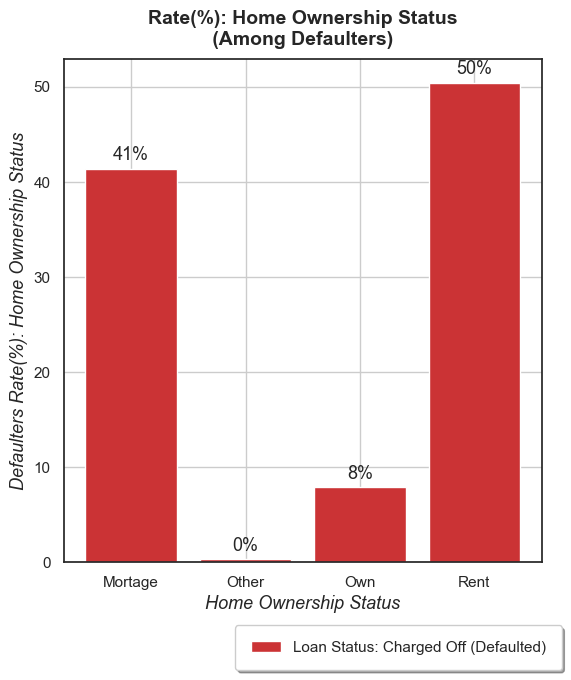

In [56]:
##Retaining the known values only
home_ls_final = home.groupby(['home_ownership','loan_status']).size().to_frame('c_hls')
home_ls_final.reset_index(inplace=True)
home_ls_final['c_hls'] = home_ls_final['c_hls'].astype('int')
home_ls_final

#Plot
sns.set(style='white')
plt.figure(figsize=(6,7), dpi=100)

home_ls_final['pct_count_of_total']= round(100*home_ls_final['c_hls']/home_ls_final['c_hls'].sum(),2)

ax_K1 = sns.barplot(x=home_ls_final.home_ownership, y=home_ls_final.pct_count_of_total, hue=home_ls_final.loan_status, palette='Set1')
plt.xlabel('Home Ownership Status', fontsize= 13, fontstyle='italic')
plt.ylabel('Defaulters Rate(%): Home Ownership Status', fontsize= 13, fontstyle='italic')
plt.title('Rate(%): Home Ownership Status\n (Among Defaulters) ',fontsize= 14, fontweight='bold', pad=10)
plt.ylim(0,100)
#Legend
L1= ax_K1.legend(loc='upper center', bbox_to_anchor=(0.70,-0.11), fancybox=True, framealpha=1, shadow=True, borderpad=1)
L1.get_texts()[0].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_K1.patches:
    ax_K1.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), fontsize=13, textcoords = 'offset points')  
plt.xticks([0,1,2,3],['Mortage','Other','Own','Rent'])
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()


### Above analysis shows 91 % of the defaulters already have a mortgage taken out  or live on rent

# Rate(%) Verification Status (Among Defaulters)

In [57]:
#Check unique items in 'verification_status' column
loan.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

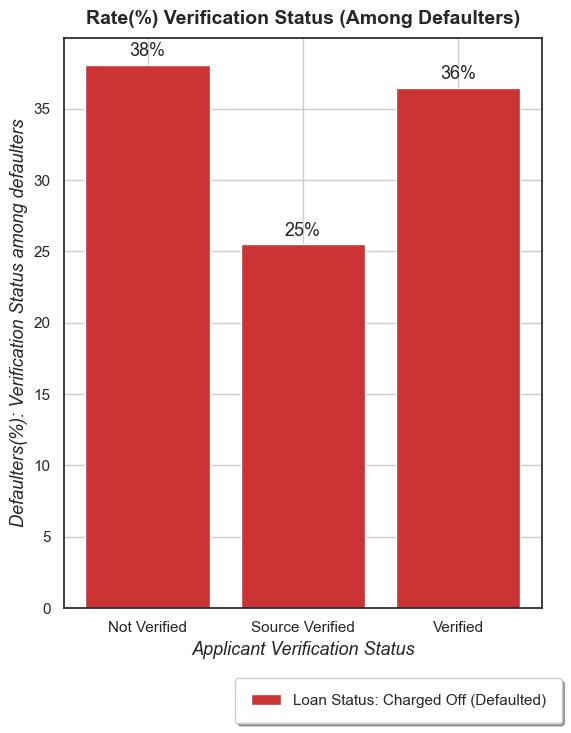

In [58]:
##Finding the defaulters(%) according to 'verification_status' variable. (loan status->charged off i.e. '1')
verf_1 = loan.loc[:,['verification_status','loan_status']]
#Considering only the defaulters (charged off='1')
verf_1 = verf_1[verf_1.loan_status=='1']
#Retaining only the values known
verf_1_final = verf_1.groupby(['verification_status','loan_status']).size().to_frame('c_vls')
verf_1_final.reset_index(inplace=True)
verf_1_final['c_vls'] = verf_1_final['c_vls'].astype('int')
verf_1_final

#Plot
sns.set(style='white')
plt.figure(figsize=(6,7.5), dpi=100)

verf_1_final['pct_count_of_total']= round(100*verf_1_final['c_vls']/verf_1_final['c_vls'].sum(),2)

ax_K2 = sns.barplot(x=verf_1_final.verification_status, y=verf_1_final.pct_count_of_total, hue=verf_1_final.loan_status, palette='Set1')
plt.xlabel('Applicant Verification Status', fontsize= 13, fontstyle='italic')
plt.ylabel('Defaulters(%): Verification Status among defaulters', fontsize= 13, fontstyle='italic')
plt.ylim(0,100)
plt.title('Rate(%) Verification Status (Among Defaulters)',fontsize= 14, fontweight='bold', pad=10)
#Legend
L2= ax_K2.legend(loc='upper center', bbox_to_anchor=(0.70,-0.11), fancybox=True, framealpha=1, shadow=True, borderpad=1)
L2.get_texts()[0].set_text('Loan Status: Charged Off (Defaulted)')

#Display values
for p in ax_K2.patches:
    ax_K2.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), fontsize=13, textcoords = 'offset points')  
plt.xticks([0,1,2],['Not Verified','Source Verified','Verified'])
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()

# Defaulters Rate(%) analysis based on Loan Amount

In [59]:
##Defaulters Rate(%) analysis on the basis of loan amount. 
loan.loan_amnt.describe()

count    38566.000000
mean     11047.429083
std       7348.566643
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

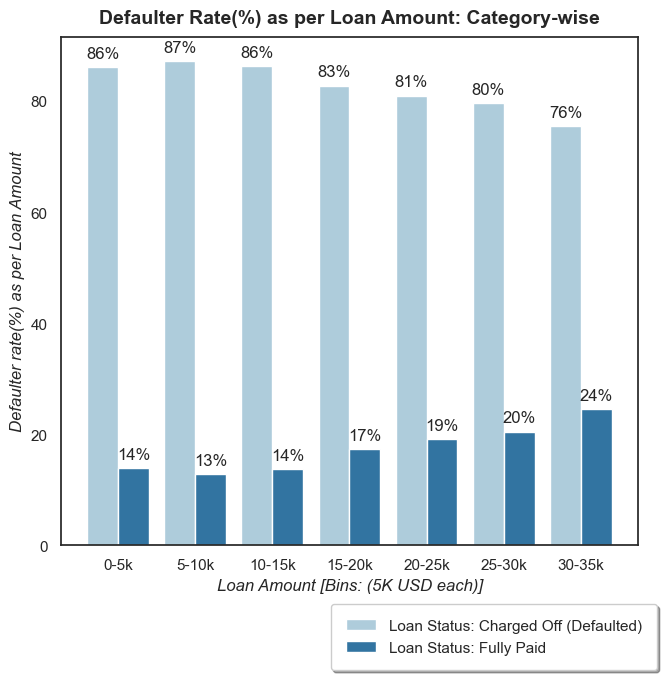

In [60]:
##Creating bins for  loan amount per the information above
loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'], [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])
loan_amnt_gby = loan.groupby(['loan_amnt_bin','loan_status']).size().to_frame('c_gls')
loan_amnt_gby.reset_index(inplace=True)
loan_amnt_gby

loan_amnt_gby['c_gls'] = loan_amnt_gby['c_gls'].astype('int')


bin1  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='0-5k']
bin1['pct_count_gwise'] =   round(100*bin1['c_gls']/bin1['c_gls'].sum(),2)

bin2  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='5-10k']
bin2['pct_count_gwise'] =   round(100*bin2['c_gls']/bin2['c_gls'].sum(),2)

bin3  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='10-15k']
bin3['pct_count_gwise'] =   round(100*bin3['c_gls']/bin3['c_gls'].sum(),2)

bin4  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='15-20k']
bin4['pct_count_gwise'] =   round(100*bin4['c_gls']/bin4['c_gls'].sum(),2)

bin5  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='20-25k']
bin5['pct_count_gwise'] =   round(100*bin5['c_gls']/bin5['c_gls'].sum(),2)

bin6  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='25-30k']
bin6['pct_count_gwise'] =   round(100*bin6['c_gls']/bin6['c_gls'].sum(),2)

bin7  = loan_amnt_gby[loan_amnt_gby.loan_amnt_bin=='30-35k']
bin7['pct_count_gwise'] =   round(100*bin7['c_gls']/bin7['c_gls'].sum(),2)

loan_amnt_ls_final = pd.concat([bin1,bin2,bin3,bin4,bin5,bin6,bin7])

sns.set(style='white')
plt.figure(figsize=(7,7), dpi=100)

ax_ln = sns.barplot(x='loan_amnt_bin',y='pct_count_gwise', hue = 'loan_status',data=loan_amnt_ls_final, palette=('Paired'))
plt.xlabel('Loan Amount [Bins: (5K USD each)]', fontsize= 12, fontstyle='italic')
plt.ylabel('Defaulter rate(%) as per Loan Amount', fontsize= 12, fontstyle='italic')
plt.ylim(0,100)
plt.title('Defaulter Rate(%) as per Loan Amount: Category-wise',fontsize= 14, fontweight='bold', pad=10)
#Legend
A= ax_ln.legend(loc='upper center', bbox_to_anchor=(0.75,-0.1), fancybox=True, framealpha=1, shadow=True, borderpad=1)
A.get_texts()[0].set_text('Loan Status: Charged Off (Defaulted)')
A.get_texts()[1].set_text('Loan Status: Fully Paid')
#Display values
for p in ax_ln.patches:
    ax_ln.annotate(format(p.get_height(), '.0f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), textcoords = 'offset points')    

plt.tight_layout()
plt.autoscale()
plt.show()

# Defaulters Rate(%) analysis based on Annual Income of approved Loan Applicants

In [61]:
##Annual Income and Defaulters rate(%) analysis
round(loan.annual_inc.describe(),2)

count      38566.00
mean       68782.16
std        64226.31
min         4000.00
25%        40000.00
50%        58876.00
75%        82000.00
max      6000000.00
Name: annual_inc, dtype: float64

In [62]:
loan.annual_inc.quantile([.1, .2,.3,.4 ,.5 ,.6 ,.7,.8,.9,.95,.98,1])

0.10      30000.00
0.20      37200.00
0.30      44515.88
0.40      50004.00
0.50      58876.00
0.60      65004.00
0.70      75000.00
0.80      90000.00
0.90     115000.00
0.95     140004.00
0.98     187000.00
1.00    6000000.00
Name: annual_inc, dtype: float64

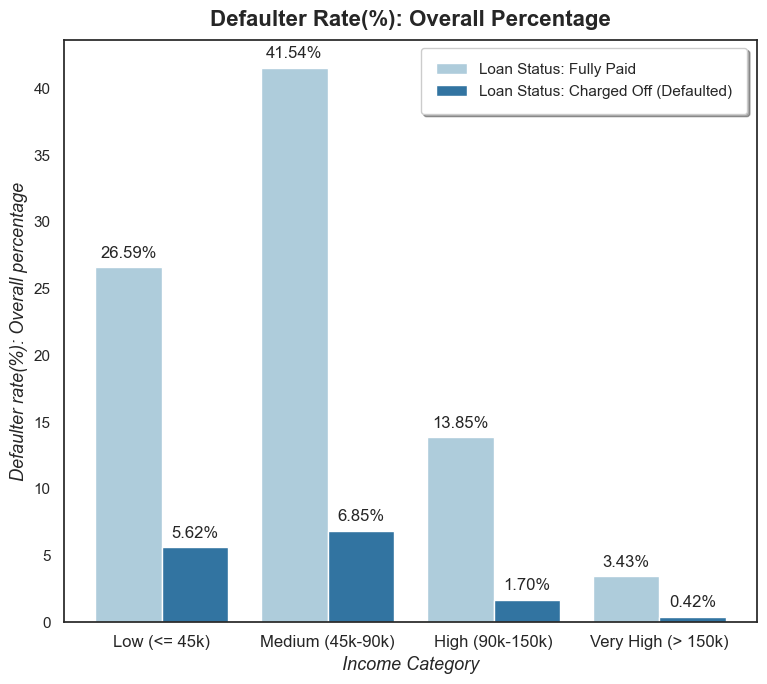

In [63]:
##Lets try and find out if we can find any inference between income and loan staus after binning the income 

def bin_annual_income (n):
    if n <= 45000:
        return 'low'
    elif n > 45000 and n <=90000:
        return 'medium'
    elif n > 90000 and n <=150000:
        return 'high'
    else:
        return 'very high'

    
loan['annual_inc_bin'] = loan['annual_inc'].apply(lambda x: bin_annual_income(x)) 


annual_inc_gby = loan.groupby(['annual_inc_bin','loan_status']).size().to_frame('c_gls')
annual_inc_gby.reset_index(inplace=True)
annual_inc_gby['c_gls'] = annual_inc_gby['c_gls'].astype('int')
annual_inc_gby


binl  = annual_inc_gby[annual_inc_gby.annual_inc_bin =='low']
binl['pct_count_gwise'] =   round(100*binl['c_gls']/binl['c_gls'].sum(),2)

binm  = annual_inc_gby[annual_inc_gby.annual_inc_bin =='medium']
binm['pct_count_gwise'] =   round(100*binm['c_gls']/binm['c_gls'].sum(),2)


binh  = annual_inc_gby[annual_inc_gby.annual_inc_bin =='high']
binh['pct_count_gwise'] =   round(100*binh['c_gls']/binh['c_gls'].sum(),2)



binvh  = annual_inc_gby[annual_inc_gby.annual_inc_bin =='very high']
binvh['pct_count_gwise'] =   round(100*binvh['c_gls']/binvh['c_gls'].sum(),2)


annual_inc_gby_final = pd.concat([binl,binm,binh,binvh])


annual_inc_gby_final['pct_count_of_total']= round(100*annual_inc_gby_final['c_gls']/annual_inc_gby_final['c_gls'].sum(),2)


sns.set(style='white')
plt.figure(figsize=(8,7), dpi=100)

#Plot
ax_ln2 = sns.barplot(x=annual_inc_gby_final.annual_inc_bin, y=annual_inc_gby_final.pct_count_of_total
                     , hue=annual_inc_gby_final.loan_status
                   , palette='Paired')
plt.xlabel('Income Category', fontsize= 13, fontstyle='italic')
plt.ylabel('Defaulter rate(%): Overall percentage', fontsize= 13, fontstyle='italic')
plt.ylim(0,100)
plt.title('Defaulter Rate(%): Overall Percentage',fontsize= 16, fontweight='bold', pad=10)
#Legend
T= ax_ln2.legend(loc='upper center', bbox_to_anchor=(0.75, 1.00), fancybox=True, framealpha=1, shadow=True, borderpad=1)
T.get_texts()[0].set_text('Loan Status: Fully Paid')
T.get_texts()[1].set_text('Loan Status: Charged Off (Defaulted)')
plt.xticks([0,1,2,3],['Low (<= 45k)','Medium (45k-90k)','High (90k-150k)','Very High (> 150k)'], fontsize=12)
for p in ax_ln2.patches:
    ax_ln2.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.,\
                                                p.get_height()), ha = 'center', \
                va = 'center', xytext = (0, 10), textcoords = 'offset points')    

plt.tight_layout()
plt.autoscale()
plt.show()